<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Akses folder images pada Google Drive

In [1]:
from google.colab import drive

#Accessing my Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## melakukan import 

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## Transformasi Linier Brightness


Formula:g(x,y)=f(x,y)+b
g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


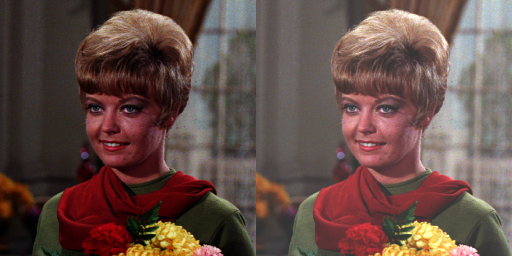

In [6]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Eror, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## Tugas Praktikum 

1. Implementasi transformasi Contrast

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


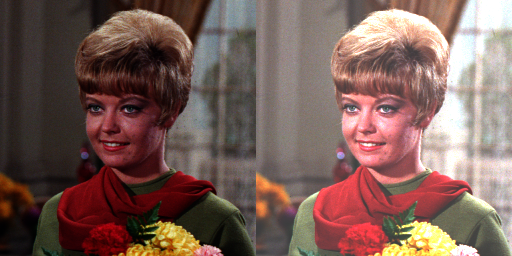

In [23]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Eror, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)
       

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------
Masukkan nilai kecerahan: 40


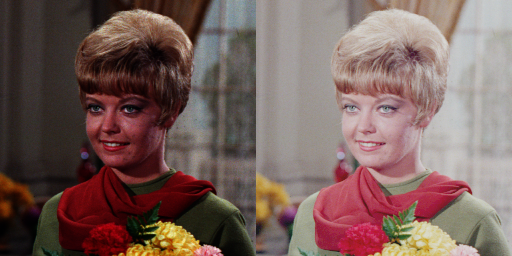

In [19]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Eror, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)
       

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


3. Implementasikan transformasi grayscale

Averaging


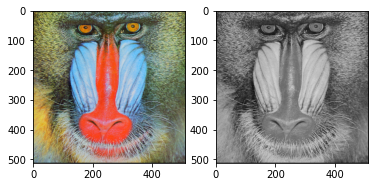

In [21]:
# Menggunakan Averaging
ori_avg = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
ori_rgb = cv.cvtColor(ori_avg, cv.COLOR_BGR2RGB)
ori_avg[:] = ori_avg.mean(axis = -1, keepdims = 1)
fig, ax = plt.subplots(1,2)
print('Averaging')
ax[0].imshow(ori_rgb)
ax[1].imshow(ori_avg)

Lightness


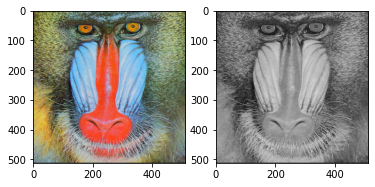

In [22]:
# Menggunakan Lightness
ori_avg = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
ori_rgb = cv.cvtColor(ori_avg, cv.COLOR_BGR2RGB)
ori_avg[:] = np.max(ori_avg,axis=-1,keepdims=10)/2+np.min(ori_avg,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
print('Lightness')
ax[0].imshow(ori_rgb)
ax[1].imshow(ori_avg)

Luminance


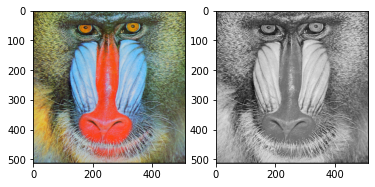

In [25]:
#Menggunakan Luminance
original = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
img = cv.cvtColor(original, cv.COLOR_BGR2RGB)
brightness_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)

R, G, B = img[:,:,0], img[:,:,1],img[:,:,2]
Y = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)

fig, ax = plt.subplots(1,2)
print('Luminance')
ax[0].imshow(img)
ax[1].imshow(Y, cmap='gray')

4. Menampilkan warna tertentu pada citra, dan merubah warna lain menjadi grayscale

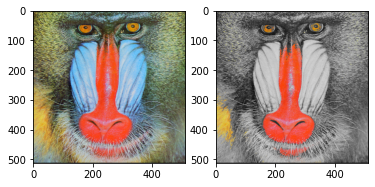

In [27]:
original = cv.imread('/content/drive/MyDrive/PCVK/Image/mandrill.tiff')
img = cv.cvtColor(original, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(original, cv.COLOR_BGR2RGB)

ret, mask = cv.threshold(img[:, :, 0], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

# extracting `orange` region using `biteise_and`
orange = cv.bitwise_and(img, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# extracting non-orange region
gray = cv.bitwise_and(img, 255 - mask3)

# orange masked output
out = gray + orange

fig, ax = plt.subplots(1,2)
ax[0].imshow(img2)
ax[1].imshow(out)